# LogReg S-Uniward 0.3 vs Miranda Attributes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, cv2
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

#Miranda dataset
train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_train_70000.csv"
test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_test_70000.csv"

TensorFlow version: 2.3.0
Eager execution: True


In [3]:
#%% Importing the dataset
MirandaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity']
trainDataset = pd.read_csv(train_dataset_url)
MirandaX_train = trainDataset.iloc[:, :-1].values
MirandaY_train = trainDataset.iloc[:, -1].values

testDataset = pd.read_csv(test_dataset_url)
MirandaX_test = testDataset.iloc[:, :-1].values
MirandaY_test = testDataset.iloc[:, -1].values

In [4]:
MirandaX_train

array([[1.502380e+01, 2.910000e+00, 2.747740e+02, ..., 1.604439e+02,
        1.477400e-01, 8.579000e-01],
       [2.801000e+00, 9.223200e-01, 2.357319e+02, ..., 1.453054e+02,
        1.200900e-01, 1.298700e+00],
       [3.988500e+00, 8.873200e-01, 1.745089e+02, ..., 1.826219e+02,
        2.003400e-01, 1.596500e+00],
       ...,
       [7.551800e+00, 2.032900e+00, 2.796423e+02, ..., 1.376493e+02,
        9.355000e-01, 1.760300e+00],
       [3.402200e+01, 4.804000e+00, 4.167042e+02, ..., 1.391423e+02,
        9.767900e-01, 1.521500e+00],
       [2.003410e+01, 3.686400e+00, 4.570151e+02, ..., 8.242910e+01,
        9.437100e-01, 1.696200e+00]])

In [5]:
#%% Feature Scaling
from sklearn.preprocessing import StandardScaler

In [6]:
MirandaLabels

['Kurtosis',
 'Skewness',
 'Std',
 'Range',
 'Median',
 'Geometric_Mean',
 'Mobility',
 'Complexity']

## Getting x and y

In [7]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]
folder="../../../Dataset/Mono/MonoSamples/S-Uniward_5" 
images=os.listdir(folder)
random.shuffle(images)
images=images
print(len(images))

40000


In [8]:
Garciay=getYFromImageList(images)
windowSize=128
GarciaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility', 'Complexity']
t = time.time()

GarciaX=pd.DataFrame(([ MirandaAttributes.attributes( cv2.imread( os.path.abspath(os.path.join(folder, images[i])) 
                                        ) ,windowSize,True)  for i in range(len(images))] ),columns=GarciaLabels)
elapsed = time.time() - t
print(elapsed)
GarciaX_train, GarciaX_test, GarciaY_train, GarciaY_test = train_test_split(GarciaX, Garciay, test_size=0.2, 
                                                                            random_state=0)

54.0598361492157


### EDA

In [9]:
pd.DataFrame(GarciaY_train).describe()

,0
count,32000.000000
mean,0.499250
std,0.500007
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
pd.DataFrame(GarciaY_train).value_counts()

0    16024
1    15976
dtype: int64

In [11]:
GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
21370,9.918339,2.475863,94.773537,552.0,21.5,23.686811,23.313099,0.385217,3.932108
2470,157.627136,12.254713,746.447571,10368.0,0.0,7897.716797,1.072629,0.620535,1.361291
13767,2.318970,0.664062,61.532257,253.0,41.5,41.377689,24.089155,0.194131,7.505395
13316,8.520466,2.541874,138.284500,624.0,0.0,38.654285,6.361059,0.124828,7.314887
26374,4.252779,1.586557,82.987152,322.0,27.0,27.579201,26.795839,0.157977,10.511610
...,...,...,...,...,...,...,...,...,...
20757,14.414732,3.050016,73.623940,474.0,43.0,39.348896,40.906059,0.314503,4.317505
32103,11.390884,2.462768,42.217537,293.0,53.5,53.960377,55.165504,0.333814,4.506675
30403,4.657472,1.692874,98.766571,408.0,22.0,32.457882,13.391571,0.135347,10.561842
21243,1.656853,0.240610,42.476280,145.0,57.5,46.545132,48.067604,0.294924,5.545305


In [12]:
GarciaX_train.describe()

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,23.836270,2.928652,109.083356,854.870844,32.320969,53.743277,26.369346,0.324072,5.906731
std,48.588159,3.239049,98.451393,1549.300167,20.857243,434.146877,14.556997,0.217388,3.030103
min,1.238583,-1.234521,14.475194,84.000000,0.000000,1.721951,1.038634,0.085735,0.894159
25%,3.145729,1.014087,58.845119,250.000000,14.000000,27.549348,14.508669,0.184827,3.533327
50%,6.377465,1.883810,81.365807,392.000000,32.500000,37.222080,25.149413,0.252571,5.630459
75%,16.672537,3.422494,120.594248,748.000000,49.000000,46.209579,37.322383,0.374950,7.998111
max,254.003906,15.906097,1021.998047,16384.000000,90.000000,16384.000000,63.118073,1.419760,16.138912


##### Dataset looks homogeneous

In [13]:
trainDataset

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity,Tag
0,15.0238,2.91000,274.7740,1789,228.0,160.4439,0.147740,0.8579,0
1,2.8010,0.92232,235.7319,917,179.0,145.3054,0.120090,1.2987,0
2,3.9885,0.88732,174.5089,817,260.0,182.6219,0.200340,1.5965,0
3,5.4531,1.83640,343.9752,1336,69.5,120.5608,0.083738,1.2973,0
4,15.8010,3.38050,443.4495,2785,118.0,113.9388,0.231590,1.2115,0
...,...,...,...,...,...,...,...,...,...
55994,5.0543,1.22740,172.0252,981,238.0,205.0903,0.945960,1.7109,1
55995,89.9023,8.30370,614.5032,7673,122.5,100.0387,0.988840,1.5964,1
55996,7.5518,2.03290,279.6423,1520,156.0,137.6493,0.935500,1.7603,1
55997,34.0220,4.80400,416.7042,3971,116.5,139.1423,0.976790,1.5215,1


In [14]:
trainDataset.iloc[:,:-1].describe()

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,23.861412,3.041558,367.443301,2756.949963,148.467740,137.751112,0.448144,1.510563
std,43.134687,2.957414,249.044479,3567.278219,72.227963,69.236967,0.301130,0.333588
min,1.137900,-1.540400,59.884100,338.000000,0.000000,4.826700,0.048408,0.086309
25%,4.010750,1.235150,221.245700,1055.000000,96.000000,99.458600,0.183990,1.303000
50%,7.952900,2.123400,299.071500,1646.000000,156.000000,138.097000,0.384070,1.577700
75%,19.820800,3.644250,427.831850,2924.000000,203.000000,174.089600,0.723175,1.780250
max,253.942400,15.903200,3624.730400,58017.000000,358.000000,3488.397300,1.408100,1.960100


In [15]:
trainDataset.describe()

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility,Complexity,Tag
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,23.861412,3.041558,367.443301,2756.949963,148.467740,137.751112,0.448144,1.510563,0.500009
std,43.134687,2.957414,249.044479,3567.278219,72.227963,69.236967,0.301130,0.333588,0.500004
min,1.137900,-1.540400,59.884100,338.000000,0.000000,4.826700,0.048408,0.086309,0.000000
25%,4.010750,1.235150,221.245700,1055.000000,96.000000,99.458600,0.183990,1.303000,0.000000
50%,7.952900,2.123400,299.071500,1646.000000,156.000000,138.097000,0.384070,1.577700,1.000000
75%,19.820800,3.644250,427.831850,2924.000000,203.000000,174.089600,0.723175,1.780250,1.000000
max,253.942400,15.903200,3624.730400,58017.000000,358.000000,3488.397300,1.408100,1.960100,1.000000


In [16]:
MirandaX_train

array([[1.502380e+01, 2.910000e+00, 2.747740e+02, ..., 1.604439e+02,
        1.477400e-01, 8.579000e-01],
       [2.801000e+00, 9.223200e-01, 2.357319e+02, ..., 1.453054e+02,
        1.200900e-01, 1.298700e+00],
       [3.988500e+00, 8.873200e-01, 1.745089e+02, ..., 1.826219e+02,
        2.003400e-01, 1.596500e+00],
       ...,
       [7.551800e+00, 2.032900e+00, 2.796423e+02, ..., 1.376493e+02,
        9.355000e-01, 1.760300e+00],
       [3.402200e+01, 4.804000e+00, 4.167042e+02, ..., 1.391423e+02,
        9.767900e-01, 1.521500e+00],
       [2.003410e+01, 3.686400e+00, 4.570151e+02, ..., 8.242910e+01,
        9.437100e-01, 1.696200e+00]])

#### Standard scalling

In [17]:
scG=StandardScaler()
sc_GarciaX_train=pd.DataFrame(scG.fit_transform(GarciaX_train),columns=GarciaLabels)
sc_GarciaX_test=pd.DataFrame(scG.transform(GarciaX_test),columns=GarciaLabels)

scM=StandardScaler()
sc_MirandaX_train=pd.DataFrame(scM.fit_transform(MirandaX_train),columns=MirandaLabels)
sc_MirandaX_test=pd.DataFrame(scM.transform(MirandaX_test),columns=MirandaLabels)

#### Recursive Feature Elimination

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEG = LogisticRegression()
rfe = RFE(logregRFEG, n_features_to_select=1)
rfe = rfe.fit(sc_GarciaX_train,GarciaY_train)
print(rfe.ranking_)
print("García's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=GarciaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[5 4 3 2 6 7 9 1 8]
García's Dataset
Ordered from most to less desired variables:


['Mobility',
 'Range',
 'Std',
 'Skewness',
 'Kurtosis',
 'Median',
 'Garcia_Gmean',
 'Complexity',
 'Epsilon_Gmean']

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEM = LogisticRegression()
rfe = RFE(logregRFEM, n_features_to_select=1)
rfe = rfe.fit(sc_MirandaX_train,MirandaY_train)
print(rfe.ranking_)
print("Miranda's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=MirandaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[4 3 5 6 7 8 2 1]
Miranda's Dataset
Ordered from most to less desired variables:


['Complexity',
 'Mobility',
 'Skewness',
 'Kurtosis',
 'Std',
 'Range',
 'Median',
 'Geometric_Mean']

RFE Shows prefferences for the variables to be predictors, meaning it to be ordered depending on de predictor-likability of a variable. Proving the anterior analysis, 

### Modelling

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(MirandaY_train,sc_MirandaX_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.264509
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.618     
Dependent Variable: y                AIC:              29640.4288
Date:               2021-09-02 05:18 BIC:              29711.8935
No. Observations:   55999            Log-Likelihood:   -14812.   
Df Model:           7                LL-Null:          -38816.   
Df Residuals:       55991            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Kurtosis         -0.7686   0.0737 -10.4343 0.0000 -0.9129 -0.6242
Skewness          1.0767   0.0673  15.9897 0.0000  0.9447  1.2087


In [21]:
sc_GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
0,-0.286451,-0.139793,-0.145351,-0.195492,-0.518819,-0.069232,-0.209954,0.281274,-0.651679
1,2.753612,2.879304,6.473998,6.140371,-1.549652,18.067839,-1.737797,1.363772,-1.500118
2,-0.442858,-0.699164,-0.482998,-0.388485,0.440095,-0.028483,-0.156641,-0.597747,0.527602
3,-0.315222,-0.119413,0.296609,-0.149019,-1.549652,-0.034756,-1.374500,-0.916549,0.464729
4,-0.403057,-0.414355,-0.265071,-0.343948,-0.255118,-0.060266,0.029299,-0.764057,1.519734
...,...,...,...,...,...,...,...,...,...
31995,-0.193909,0.037470,-0.360177,-0.245838,0.512014,-0.033156,0.998622,-0.044017,-0.524488
31996,-0.256144,-0.143836,-0.679187,-0.362667,1.015444,0.000500,1.978197,0.044815,-0.462056
31997,-0.394728,-0.381531,-0.104792,-0.288439,-0.494846,-0.049029,-0.891528,-0.868158,1.536312
31998,-0.456485,-0.829899,-0.676558,-0.458195,1.207227,-0.016580,1.490596,-0.134082,-0.119280


In [22]:
import statsmodels.api as sm
logit_modelG=sm.Logit(GarciaY_train,sc_GarciaX_train)
result=logit_modelG.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692784
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.001     
Dependent Variable: y                AIC:              44356.2005
Date:               2021-09-02 05:18 BIC:              44431.5619
No. Observations:   32000            Log-Likelihood:   -22169.   
Df Model:           8                LL-Null:          -22181.   
Df Residuals:       31991            LLR p-value:      0.0031804 
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Kurtosis        0.0298    0.0748   0.3985  0.6902  -0.1169  0.1765
Skewness       -0.0860    0.0677  -1.2717  0.2035  -0.2187  0.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(newX), y, test_size=0.2, random_state=0)
logregMiranda = LogisticRegression()
logregMiranda.fit(sc_MirandaX_train, MirandaY_train)
y_predMiranda = logregMiranda.predict(sc_MirandaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregMiranda.score(sc_MirandaX_test, MirandaY_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [24]:
logregGarcia = LogisticRegression()
logregGarcia.fit(sc_GarciaX_train, GarciaY_train)
y_predGarcia = logregGarcia.predict(sc_GarciaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregGarcia.score(sc_GarciaX_test, GarciaY_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [25]:
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
import copy
def best_subset_cv(estimator, X, Y, labels,cv=3):
    n_features = X.shape[1]
    subsets = chain.from_iterable([combinations(labels, k + 1) for k in range(n_features)])
    best_score = -np.inf
    best_subset = None
    for subset in subsets:
        estimatorCopy=copy.copy(estimator)
        score = cross_val_score(estimatorCopy, X.loc[:, list(subset)], Y, cv=cv).mean()
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score

In [26]:
logregBSM = LogisticRegression()
subM, scoM=best_subset_cv(logregBSM,sc_MirandaX_train,MirandaY_train,MirandaLabels)
print("Miranda")

Miranda


In [27]:
subM, scoM

(('Skewness', 'Geometric_Mean', 'Complexity'), 0.8934098557840381)

In [28]:
logregBSG = LogisticRegression()
subG, scoG=best_subset_cv(logregBSG,sc_GarciaX_train,GarciaY_train,GarciaLabels)
print("García")

García


In [29]:
subG, scoG

(('Skewness', 'Garcia_Gmean', 'Mobility', 'Complexity'), 0.5093436162250063)

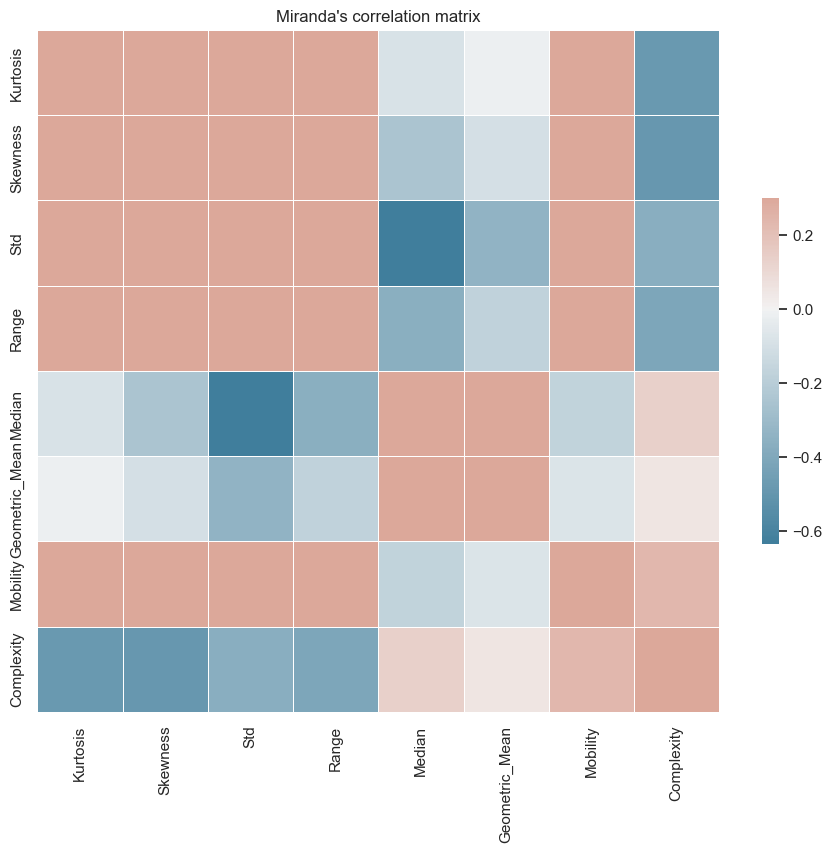

In [30]:
import seaborn as sns
sns.set_theme(style="dark")
corr = sc_MirandaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Miranda's correlation matrix")
plt.show()

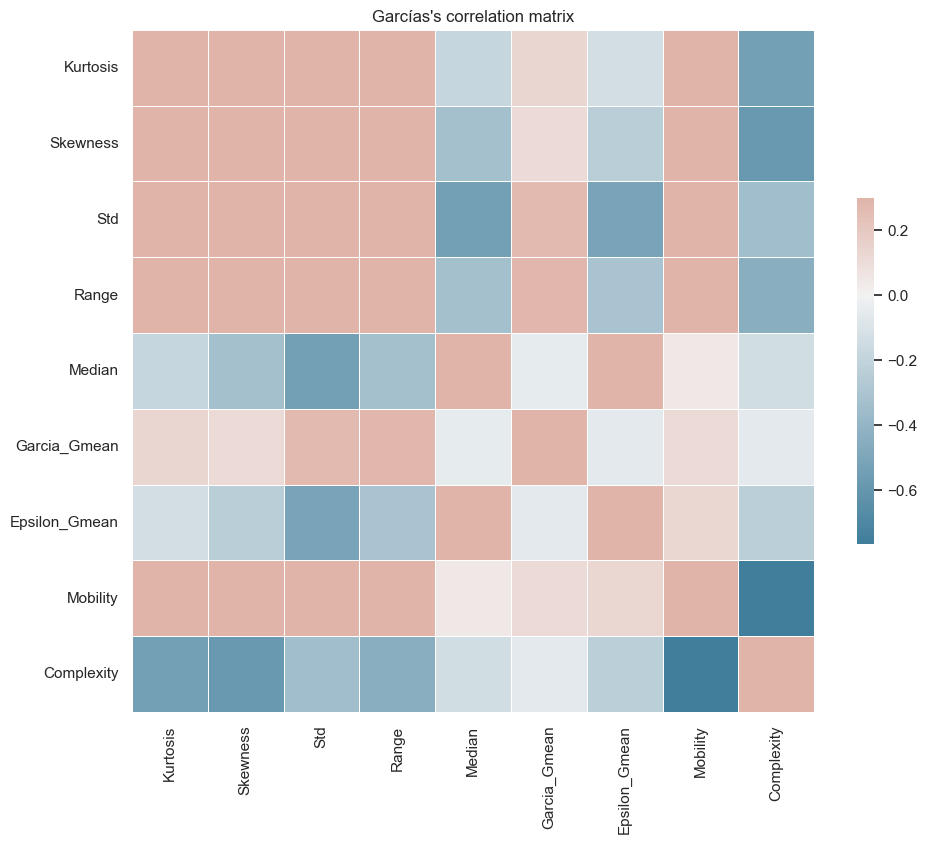

In [31]:
sns.set_theme(style="dark")
corr = sc_GarciaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcías's correlation matrix")
plt.show()